# Checking Hyperparameter Configurations after Hyperparameter Optimization (HPO) - FD001

***

In [45]:
# importing modules
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Importing HPO results (keeping only up to 300 function evaluations)
configs = pd.read_csv('./Harmonic_Mean_Results/dataset_1/test/new_results_single_obj_dataset_1_2_3_retake')

In [21]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,879.161938,13.442956,0.001681,5.422470,7.948337,5.023463,0.916018,4.690724,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
1,42.074076,31.107173,0.492120,19.037790,41.146119,33.112050,0.355375,21.738432,"{""num_rec"": 1, ""max_time"": 29, ""neuron_0"": 38,..."
2,68.201320,56.273127,-288.507299,9.504915,57.959525,47.907047,-228.412907,9.529593,"{""num_rec"": 1, ""max_time"": 42, ""neuron_0"": 75,..."
3,11.682171,6.476700,0.825046,3.973408,9.586537,4.831271,0.814487,3.263510,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
4,44.851458,33.098419,-72.243914,6.609819,36.071873,25.327510,-59.447482,6.328387,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."


In [22]:
# Some cfgs were infeasible
configs.shape

(281, 9)

In [23]:
# Scaling data to calculate the hypervolume indicator (HVI)
scaler = MinMaxScaler()
norm_cfgs = scaler.fit_transform(configs[['rmse_test', 'uncertainty_test']])

In [24]:
hyper_volume =[]
for i in range(norm_cfgs.shape[0]):
    hv = pg.hypervolume(norm_cfgs[:i+1])
    hyper_volume.append(hv.compute(ref_point=[1.1,1.1]))

hyper_volume = np.array(hyper_volume)

In [25]:
# checking also bi-objective results to combine them later on
configs_bi = pd.read_csv('./GRU/Final_experiments/dataset_1/results_no_cv_HO_14_12_MO').iloc[:300]

In [26]:
configs_bi.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,1.181496e+02,9.547102e+01,-8.401320,0.539599,1.145878e+02,1.008391e+02,-14.996822,0.552505,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
1,3.871338e+01,2.933810e+01,0.356078,15.063834,3.744115e+01,3.006062e+01,0.127134,15.859310,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,4.784384e+01,3.659232e+01,0.118531,5.907845,4.567716e+01,3.656544e+01,-0.127551,5.832887,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
3,4.544020e+01,3.409842e+01,0.070034,8.355793,4.167088e+01,3.360285e+01,-0.126457,8.494248,"{""num_rec"": 1, ""max_time"": 27, ""neuron_0"": 95,..."
4,8.396453e+10,1.083317e+09,-0.000166,0.407556,1.066565e+09,1.068397e+08,-0.010136,0.411235,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [27]:
configs_bi.shape

(300, 9)

In [28]:
# Scaling data to calculate the hypervolume indicator (HVI)
scaler_bi = MinMaxScaler()
norm_cfgs_bi = scaler_bi.fit_transform(configs_bi[['rmse_test', 'uncertainty_test']])

In [29]:
hyper_volume_bi =[]
for i in range(norm_cfgs_bi.shape[0]):
    hv_bi = pg.hypervolume(norm_cfgs_bi[:i+1])
    hyper_volume_bi.append(hv_bi.compute(ref_point=[1.1,1.1]))

hyper_volume_bi = np.array(hyper_volume_bi)

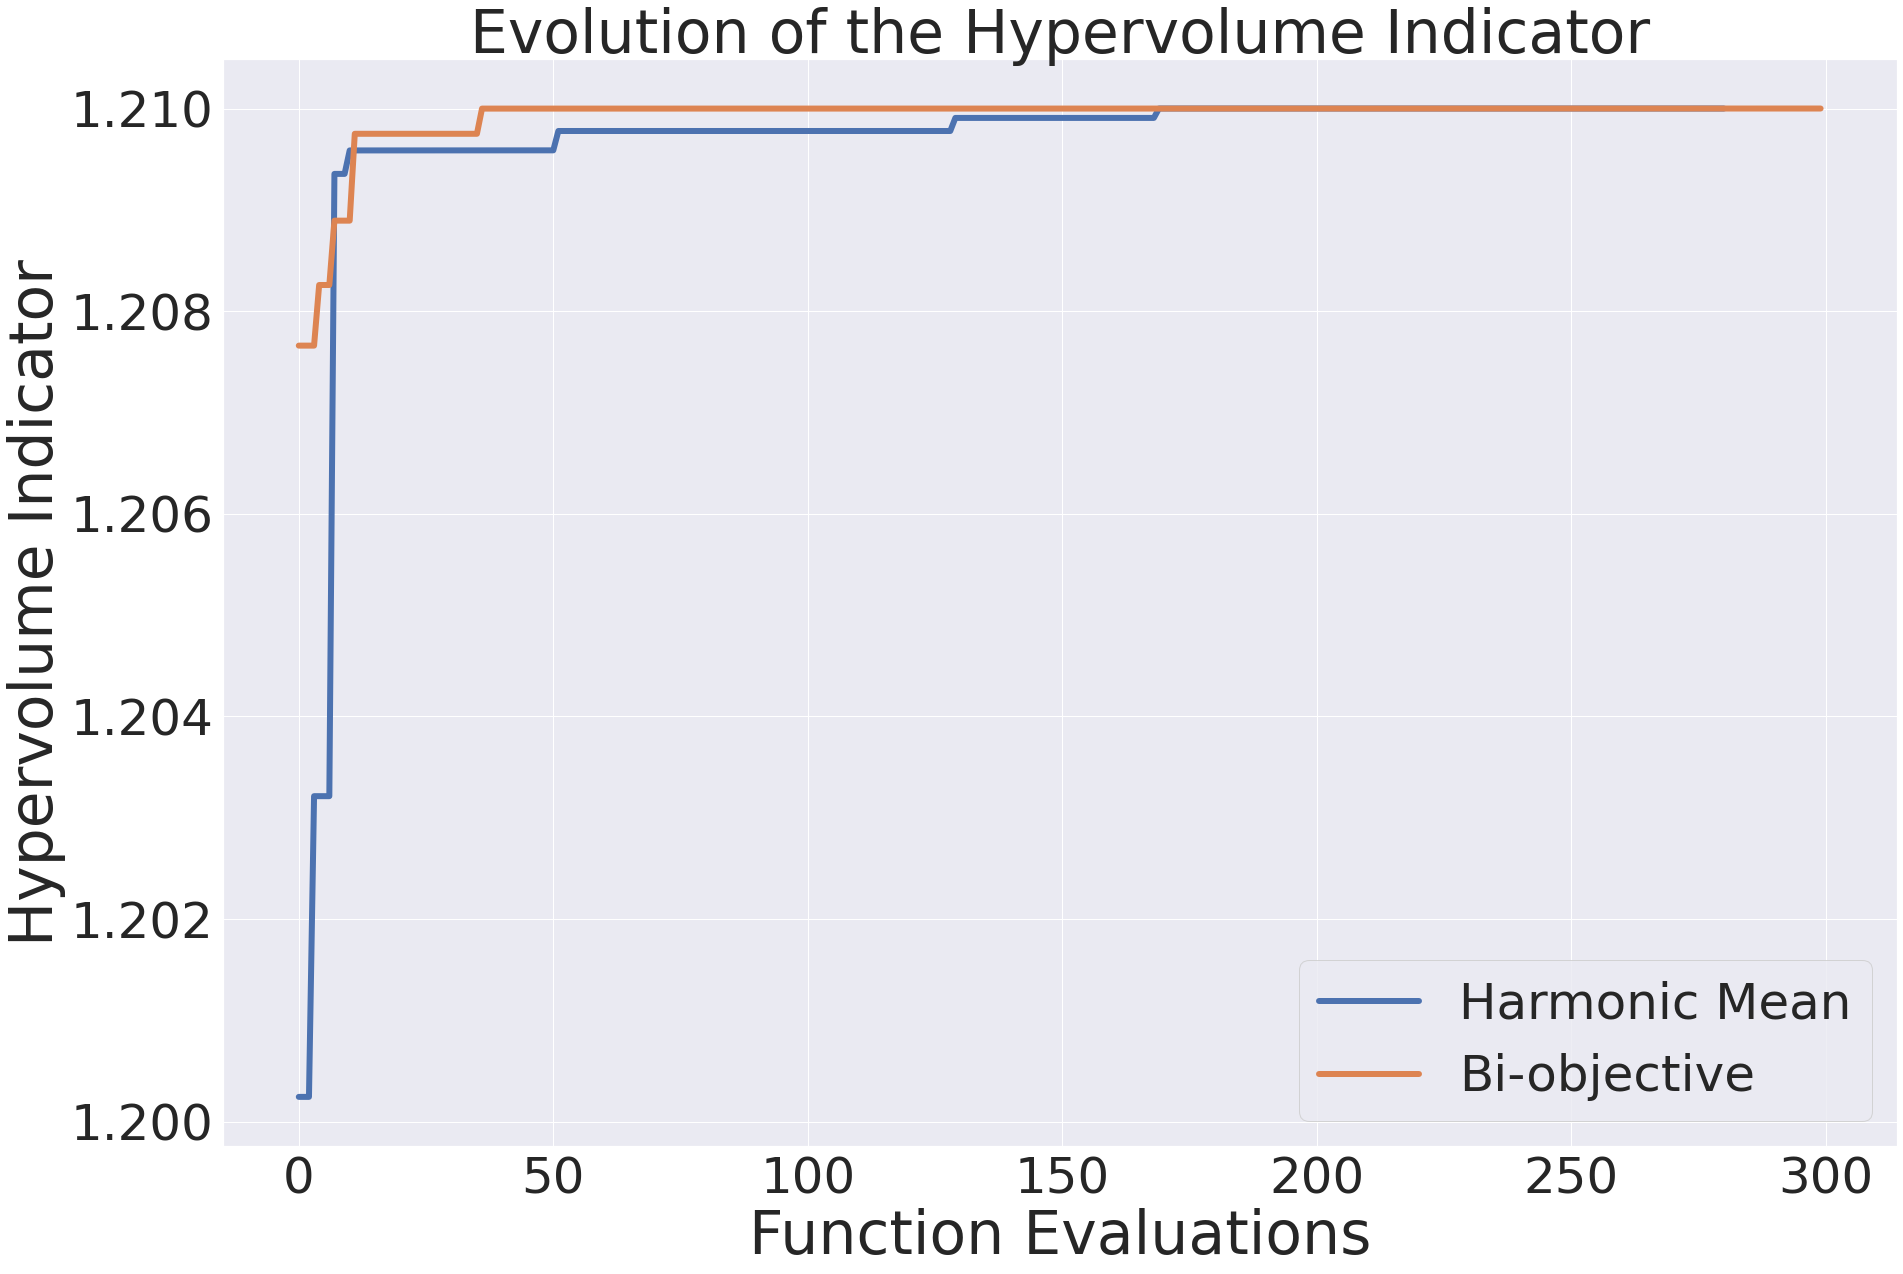

In [30]:
# Ploting HVI of both approaches

plt.figure(figsize=(30,20))
plt.plot(np.arange(hyper_volume.shape[0]), hyper_volume, label='Harmonic Mean', linewidth=6) 
plt.plot(np.arange(hyper_volume_bi.shape[0]), hyper_volume_bi, label='Bi-objective', linewidth=6)
plt.xlabel('Function Evaluations', fontsize=60)
plt.ylabel('Hypervolume Indicator', fontsize=60)
plt.title('Evolution of the Hypervolume Indicator', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size': 50}) 

# plt.savefig('./paper_figures/cmapss_1_HM_vs_BI_HVI_RETAKE.pdf', format='pdf')
 



In [31]:
# Calculating the Pareto front of the signle-objective method
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'uncertainty_test']]) 

In [32]:
pareto_configs = configs.iloc[pareto_index] 

In [33]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
154,4.254174,1.981173,0.982561,7.334978,4.211031,1.648317,0.970479,6.210769,"{""num_rec"": 1, ""max_time"": 41, ""neuron_0"": 52,..."
29,8.556123,4.251152,0.924224,2.241270,6.091472,2.825808,0.935180,2.006770,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
272,9.928486,5.045118,0.933662,1.425256,12.848347,6.020891,0.830865,0.879652,"{""num_rec"": 3, ""max_time"": 20, ""neuron_0"": 26,..."
266,33.385258,28.991886,-0.220581,0.241554,32.293761,29.244426,-0.579269,0.222816,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 40,..."
180,36.902199,27.180999,0.541241,0.055319,32.544138,25.766195,0.488838,0.035376,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 48,..."
169,38.311240,34.769412,-11.243588,0.002713,40.199357,37.356577,-20.197057,0.000005,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,..."


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

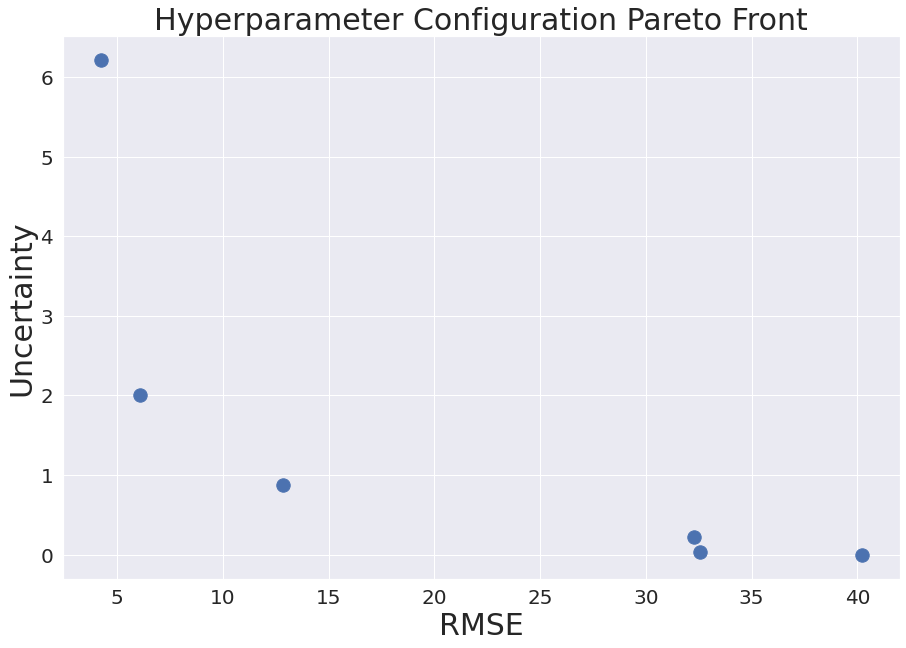

In [34]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configuration Pareto Front', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

***

Creating Figure 8 from paper

In [36]:
# Loading results on dedicated test set.
# Models have been trained on the entirety of the training data with the configurations of the Pareto front.
# The results have been saved in the file that is loaded below.
Results_retake = pd.read_csv('./Harmonic_Mean_Results/dataset_1/test/Results_retake')

Combining the Results with the Pareto front.

In [38]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
154,4.254174,1.981173,0.982561,7.334978,4.211031,1.648317,0.970479,6.210769,"{""num_rec"": 1, ""max_time"": 41, ""neuron_0"": 52,..."
29,8.556123,4.251152,0.924224,2.241270,6.091472,2.825808,0.935180,2.006770,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
272,9.928486,5.045118,0.933662,1.425256,12.848347,6.020891,0.830865,0.879652,"{""num_rec"": 3, ""max_time"": 20, ""neuron_0"": 26,..."
266,33.385258,28.991886,-0.220581,0.241554,32.293761,29.244426,-0.579269,0.222816,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 40,..."
180,36.902199,27.180999,0.541241,0.055319,32.544138,25.766195,0.488838,0.035376,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 48,..."
169,38.311240,34.769412,-11.243588,0.002713,40.199357,37.356577,-20.197057,0.000005,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,..."


In [39]:
pareto_configs.reset_index(drop=True, inplace=True) 

In [41]:
Results_retake['rank'] = pareto_configs.index 

In [42]:
Results_retake

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg,rank
0,3.708381,1.811908,0.986157,6.658229,33.214873,27.880193,0.022839,7.926165,"{""num_rec"": 1, ""max_time"": 41, ""neuron_0"": 52,...",0
1,8.275389,3.842460,0.930123,4.152230,35.189743,28.078110,-0.118644,4.635087,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,...",1
2,12.936794,11.349018,0.901211,1.672812,37.505346,31.499391,0.255562,2.590184,"{""num_rec"": 3, ""max_time"": 20, ""neuron_0"": 26,...",2
3,42.129176,37.958344,-1.854213,0.279227,32.198861,25.184896,-0.629157,0.263888,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 40,...",3
4,34.354936,24.437656,0.536372,0.063458,25.972998,19.401963,0.596993,0.064536,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 48,...",4
5,21.563993,19.909705,0.009812,0.003338,27.343713,22.607368,-0.348258,0.000038,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,...",5


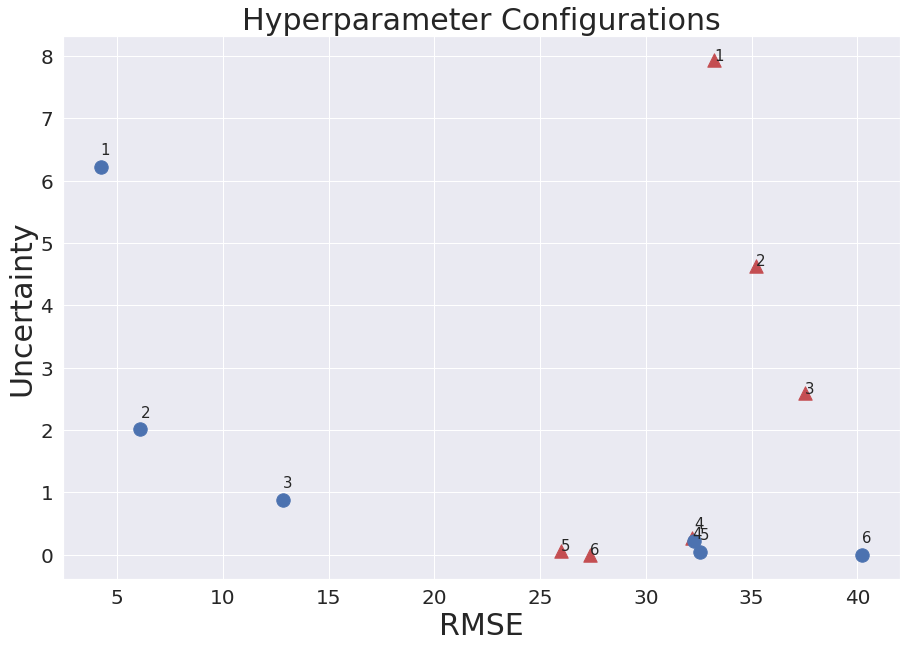

In [44]:
x = Results_retake['rmse_test'].values
y = Results_retake['uncertainty_test'].values
x_prime = pareto_configs['rmse_test'].values
y_prime = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, marker='^',s=180, c='r')
plt.scatter(x_prime, y_prime,s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(0,60)
# plt.ylim(-1,50)

for i, txt in enumerate(Results_retake['rank']):
    plt.annotate(txt+1, (x[i], y[i]), fontsize=15)

for i, txt in enumerate(pareto_configs.index):
    plt.annotate(txt+1, (x_prime[i], y_prime[i]+0.2), fontsize=15)

# plt.savefig('./paper_figures/cmapss_1_obj_space_harmonic_mean_RETAKE.pdf', format='pdf')
